# Credit risk assessor

## 0. Carga de librerías

In [1]:
import pandas as pd
from imblearn.combine import SMOTEENN
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Exploratory Data Analisys - EDA
Realizaremos investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.

In [255]:
# Carga de archivos
X_train = pd.read_csv("Train Data.csv")
X_test = pd.read_csv("Test Data.csv")

In [256]:
num_train = len(X_train)
num_test = len(X_test)
print(f"Número de registros de entrenamiento: {num_train}")
print(f"Número de registros de test: {num_test}")

Número de registros de entrenamiento: 1000
Número de registros de test: 300


In [257]:
# Creamos la etiqueta y_train y la borramos de X_train
y_train = X_train.pop('label').to_frame()

In [258]:
X_train.describe()

,ID,edad,montoSolicitado,montoOtorgado,quincenal,dependientesEconomicos,fico,ingresosMensuales,gastosMensuales,emailScore,NUMTDC_AV
count,1000.000000,996.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,873.000000,506.000000
mean,500.500000,34.588353,15871.090740,11871.470470,0.156000,0.995000,533.60800,24852.949160,12692.456000,1.882016,2.203557
std,288.819436,10.176296,17109.302264,12951.028413,0.363037,1.127939,141.94502,38290.063995,28816.956572,5.325080,1.518228
min,1.000000,18.000000,1000.000000,1000.000000,0.000000,0.000000,0.00000,12.000000,2.000000,0.000000,1.000000
25%,250.750000,27.000000,5289.500000,4393.750000,0.000000,0.000000,491.00000,10000.000000,4000.000000,0.000000,1.000000
50%,500.500000,32.000000,11000.000000,7795.000000,0.000000,1.000000,560.00000,16000.000000,7000.000000,1.000000,2.000000
75%,750.250000,40.000000,19000.000000,15000.000000,0.000000,2.000000,618.25000,25000.000000,14000.000000,1.000000,3.000000
max,1000.000000,69.000000,150000.000000,100000.000000,1.000000,5.000000,748.00000,900000.000000,750000.000000,80.000000,12.000000


In [259]:
X_train.head()

,ID,edad,montoSolicitado,montoOtorgado,genero,quincenal,dependientesEconomicos,nivelEstudio,fico,ingresosMensuales,gastosMensuales,emailScore,browser,NUMTDC_AV
0,1,38.0,11890.0,11890.0,Hombre,0,1,Universidad,561,7000.0,7000,0.0,CHROME9,1.0
1,2,26.0,3700.0,3700.0,Hombre,1,0,Preparatoria,649,8000.0,3000,0.0,CHROME9,1.0
2,3,28.0,13980.0,13980.0,Hombre,0,0,Universidad,575,7500.0,2000,NaN,NaN,3.0
3,4,27.0,12016.0,6286.0,Hombre,0,0,Universidad,651,12800.0,4300,1.0,UNKNOWN,NaN
4,5,31.0,20000.0,12000.0,Hombre,1,1,Universidad,444,20000.0,12000,1.0,MOBILE_SAFARI,NaN


In [260]:
X_test.head()

,ID,edad,montoSolicitado,montoOtorgado,genero,quincenal,dependientesEconomicos,nivelEstudio,fico,ingresosMensuales,gastosMensuales,emailScore,browser,NUMTDC_AV
0,1,30.0,20000.0,40000.0,Hombre,1,0,Universidad,575,25000.0,15000,1.0,UNKNOWN,2.0
1,2,31.0,2000.0,2000.0,Hombre,0,4,Preparatoria,635,12000.0,8000,8.0,CHROME9,NaN
2,3,29.0,15000.0,15000.0,Mujer,0,0,Universidad,568,20000.0,14000,0.0,CHROME_MOBILE,1.0
3,4,20.0,7000.0,6000.0,Mujer,0,1,Preparatoria,643,2000.0,6000,1.0,CHROME_MOBILE,NaN
4,5,34.0,18000.0,12999.0,Hombre,1,1,Universidad,546,50000.0,30000,0.0,APPLE_WEB_KIT,2.0


In [261]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   edad                    996 non-null    float64
 2   montoSolicitado         1000 non-null   float64
 3   montoOtorgado           1000 non-null   float64
 4   genero                  1000 non-null   object 
 5   quincenal               1000 non-null   int64  
 6   dependientesEconomicos  1000 non-null   int64  
 7   nivelEstudio            1000 non-null   object 
 8   fico                    1000 non-null   int64  
 9   ingresosMensuales       1000 non-null   float64
 10  gastosMensuales         1000 non-null   int64  
 11  emailScore              873 non-null    float64
 12  browser                 871 non-null    object 
 13  NUMTDC_AV               506 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory

In [262]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      300 non-null    int64  
 1   edad                    297 non-null    float64
 2   montoSolicitado         300 non-null    float64
 3   montoOtorgado           300 non-null    float64
 4   genero                  300 non-null    object 
 5   quincenal               300 non-null    int64  
 6   dependientesEconomicos  300 non-null    int64  
 7   nivelEstudio            300 non-null    object 
 8   fico                    300 non-null    int64  
 9   ingresosMensuales       300 non-null    float64
 10  gastosMensuales         300 non-null    int64  
 11  emailScore              261 non-null    float64
 12  browser                 257 non-null    object 
 13  NUMTDC_AV               184 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory 

In [263]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


#### Veamos las distribuciones:

In [264]:
X_train.columns.values

array(['ID', 'edad', 'montoSolicitado', 'montoOtorgado', 'genero',
       'quincenal', 'dependientesEconomicos', 'nivelEstudio', 'fico',
       'ingresosMensuales', 'gastosMensuales', 'emailScore', 'browser',
       'NUMTDC_AV'], dtype=object)

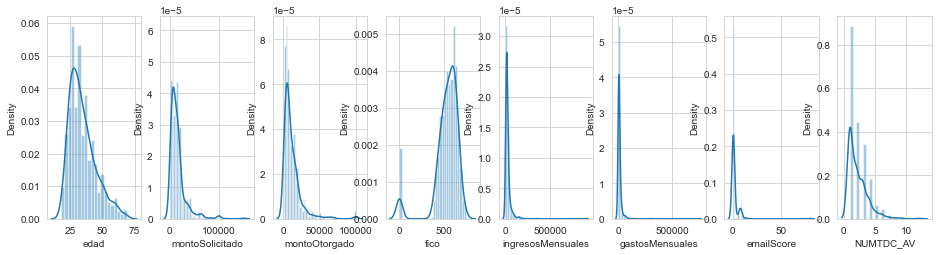

In [265]:
l = ['edad', 'montoSolicitado', 'montoOtorgado', 'fico',
     'ingresosMensuales', 'gastosMensuales', 'emailScore', 'NUMTDC_AV']
number_of_columns=len(X_train.columns.values)
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(X_train[l[i]],kde=True) 

## 1.1 Manejo de valores nulos o valores faltantes: 
Tenemos los campos de "edad", "emailscore","browser" y "NUMTDC_AV" con valores nulos, tanto en X_train como en X_test
Los trataremos de la siguiente forma (hay diversas maneras de hacerlo):
- Se obtendrá el valor mas común de cada columna y ese será el valor asignado a esos campos "nulos".
- Hay otras maneras, como por ejemplo tomar la media y asignarla a esos campos "nulos", otro posible tratamiento sería eliminar esos registros pero como nuestros registros no son muy cuantiosos es mejor preservarlos para el entrenamiento del modelo.

In [266]:
# Primero lo hacemos con los datos de entrenamiento
X_train = X_train.fillna(X_train.mode().iloc[0])

In [267]:
# Ahora lo hacemos con los datos de test
X_test = X_test.fillna(X_test.mode().iloc[0])

In [268]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   edad                    1000 non-null   float64
 2   montoSolicitado         1000 non-null   float64
 3   montoOtorgado           1000 non-null   float64
 4   genero                  1000 non-null   object 
 5   quincenal               1000 non-null   int64  
 6   dependientesEconomicos  1000 non-null   int64  
 7   nivelEstudio            1000 non-null   object 
 8   fico                    1000 non-null   int64  
 9   ingresosMensuales       1000 non-null   float64
 10  gastosMensuales         1000 non-null   int64  
 11  emailScore              1000 non-null   float64
 12  browser                 1000 non-null   object 
 13  NUMTDC_AV               1000 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory

In [269]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      300 non-null    int64  
 1   edad                    300 non-null    float64
 2   montoSolicitado         300 non-null    float64
 3   montoOtorgado           300 non-null    float64
 4   genero                  300 non-null    object 
 5   quincenal               300 non-null    int64  
 6   dependientesEconomicos  300 non-null    int64  
 7   nivelEstudio            300 non-null    object 
 8   fico                    300 non-null    int64  
 9   ingresosMensuales       300 non-null    float64
 10  gastosMensuales         300 non-null    int64  
 11  emailScore              300 non-null    float64
 12  browser                 300 non-null    object 
 13  NUMTDC_AV               300 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory 

#### Ya no tenemos registros nulos ! 
Han sido susituidos por el valor mas común de cada campo.

## 1.2 Manejo de registros duplicados: 

In [271]:
# Revisamos el set de entrenamiento y test
print(len(X_train[X_train.duplicated(['ID'], keep=False)]))
print(len(X_test[X_test.duplicated(['ID'], keep=False)]))

0
0


#### No tenemos registros duplicados!

## 1.3 Manejo de valores atípicos 

In [272]:
X_train.columns.values

array(['ID', 'edad', 'montoSolicitado', 'montoOtorgado', 'genero',
       'quincenal', 'dependientesEconomicos', 'nivelEstudio', 'fico',
       'ingresosMensuales', 'gastosMensuales', 'emailScore', 'browser',
       'NUMTDC_AV'], dtype=object)

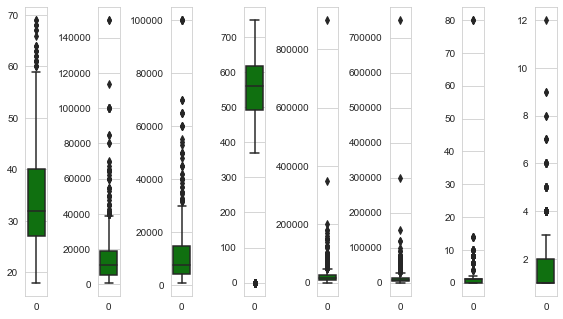

In [273]:
l = ['edad', 'montoSolicitado', 'montoOtorgado', 'fico',
     'ingresosMensuales', 'gastosMensuales', 'emailScore', 'NUMTDC_AV']
number_of_columns=len(X_train.columns.values)
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data=X_train[l[i]], color='green', orient='v')
    plt.tight_layout()

#### Tenemos outliers en todas las categorías
Se desconoce la "política" de que hacer con estos "outliers", si son aceptables o hasta que rango, sin embargo los analizaremos uno a uno para tener información y poder tomar desiciones a futuro con ellos

In [274]:
# Función para detectar anomalías (outliers), en nuestro caso con mas de 3 desviaciones estándar
def find_anomalies(data):

    anomalies = []
    no_anomalies = []

    # Establecemos el límite superior e inferior a 3 desviaciones estándar
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 3
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(f"Lower limit: {lower_limit.iloc[0]}")
    print(f"Upper limit: {upper_limit.iloc[0]}")

    # Generar outliers
    for index, row in data.iterrows():
        outlier = row # obtener primer columna
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append((index, outlier))
        else:
            no_anomalies.append((index, outlier))
    return ((anomalies, no_anomalies))

In [275]:
X_train.head()

,ID,edad,montoSolicitado,montoOtorgado,genero,quincenal,dependientesEconomicos,nivelEstudio,fico,ingresosMensuales,gastosMensuales,emailScore,browser,NUMTDC_AV
0,1,38.0,11890.0,11890.0,Hombre,0,1,Universidad,561,7000.0,7000,0.0,CHROME9,1.0
1,2,26.0,3700.0,3700.0,Hombre,1,0,Preparatoria,649,8000.0,3000,0.0,CHROME9,1.0
2,3,28.0,13980.0,13980.0,Hombre,0,0,Universidad,575,7500.0,2000,1.0,CHROME_MOBILE,3.0
3,4,27.0,12016.0,6286.0,Hombre,0,0,Universidad,651,12800.0,4300,1.0,UNKNOWN,1.0
4,5,31.0,20000.0,12000.0,Hombre,1,1,Universidad,444,20000.0,12000,1.0,MOBILE_SAFARI,1.0


### 1.3.1 Valores atípicos para "montoSolicitado"

In [276]:
(anomalies_montoSolicitado, 
 no_anomalies_montoSolicitado) = find_anomalies(X_train.set_index('ID')[['montoSolicitado']])
print(f"Number of records with anomalies: {len(anomalies_montoSolicitado)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_montoSolicitado)}")

Lower limit: -35456.81605102128
Upper limit: 67198.99753102128
Number of records with anomalies: 19
Number of records with NO anomalies: 981


In [277]:
for row in anomalies_montoSolicitado:
    print("ID:",row[0], ", Monto Solicitado", row[1][0]) 

ID: 77 , Monto Solicitado 100000.0
ID: 154 , Monto Solicitado 85000.0
ID: 191 , Monto Solicitado 113490.0
ID: 194 , Monto Solicitado 70000.0
ID: 199 , Monto Solicitado 100000.0
ID: 313 , Monto Solicitado 80000.0
ID: 375 , Monto Solicitado 100000.0
ID: 386 , Monto Solicitado 100000.0
ID: 430 , Monto Solicitado 100000.0
ID: 561 , Monto Solicitado 100000.0
ID: 611 , Monto Solicitado 150000.0
ID: 726 , Monto Solicitado 100000.0
ID: 755 , Monto Solicitado 80000.0
ID: 795 , Monto Solicitado 69350.0
ID: 804 , Monto Solicitado 100000.0
ID: 862 , Monto Solicitado 85000.0
ID: 864 , Monto Solicitado 100000.0
ID: 943 , Monto Solicitado 150000.0
ID: 954 , Monto Solicitado 100000.0


#### Tenemos 19 registros cuyo "montoSolicitado" es mayor a 3 desviaciones estándar.
Eso solo como información ya que no podemos considerarlos como outliers, pero si podemos tenerlos en cuenta para algún tipo de "TRATAMIENTO ESPECIAL" ya que son créditos solicitados mucho mas altos de lo normal!!

<AxesSubplot:xlabel='montoSolicitado'>

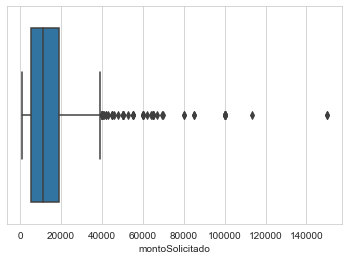

In [278]:
sns.boxplot(X_train['montoSolicitado'])

### 1.3.2 Valores atípicos para "ingresosMensuales"

In [279]:
(anomalies_ingresosMensuales, 
 no_anomalies_ingresosMensuales) = find_anomalies(X_train.set_index('ID')[['ingresosMensuales']])
print(f"Number of records with anomalies: {len(anomalies_ingresosMensuales)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_ingresosMensuales)}")

Lower limit: -90017.24282643576
Upper limit: 139723.14114643575
Number of records with anomalies: 14
Number of records with NO anomalies: 986


In [280]:
for row in anomalies_ingresosMensuales:
    print("ID:",row[0], ", Ingresos mensuales", row[1][0]) 

ID: 77 , Ingresos mensuales 150000.0
ID: 148 , Ingresos mensuales 200000.0
ID: 230 , Ingresos mensuales 150000.0
ID: 235 , Ingresos mensuales 350000.0
ID: 236 , Ingresos mensuales 150000.0
ID: 313 , Ingresos mensuales 150000.0
ID: 386 , Ingresos mensuales 160000.0
ID: 561 , Ingresos mensuales 180000.0
ID: 573 , Ingresos mensuales 140000.0
ID: 649 , Ingresos mensuales 170000.0
ID: 706 , Ingresos mensuales 900000.0
ID: 755 , Ingresos mensuales 180000.0
ID: 845 , Ingresos mensuales 150000.0
ID: 864 , Ingresos mensuales 150000.0


#### Tenemos 19 registros cuyo "ingresosMensuales" es mayor a 3 desviaciones estándar.
Eso solo como información ya que no podemos considerarlos como outliers, pero si podemos tenerlos en cuenta para algún tipo de "TRATAMIENTO ESPECIAL" ya que los ingresos mensuales son mucho mas altos de lo normal!!

<AxesSubplot:xlabel='ingresosMensuales'>

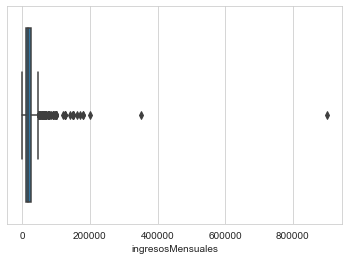

In [281]:
sns.boxplot(X_train['ingresosMensuales'])

In [282]:
df_anomalies_montoSolicitado = pd.DataFrame(anomalies_montoSolicitado, columns = ['ID','Otro'])
df_anomalies_ingresosMensuales = pd.DataFrame(anomalies_ingresosMensuales, columns = ['ID','Otro'])

In [283]:
outliers_1_2 = (pd.merge(df_anomalies_montoSolicitado, 
                         df_anomalies_ingresosMensuales, 
                         how='inner', on = "ID")['ID'])
print(outliers_1_2)

0     77
1    313
2    386
3    561
4    755
5    864
Name: ID, dtype: int64


#### 5 registros tienen mas de 3 desviaciones estándar en los campos de "montoSolicitado" e "ingresosMensuales".
Estos resultados reflejan el hecho de que para pedir montos "altos" de crédito también es necesario tener ingresos mensuales "altos", estos registros cumplen con ese requisito.

### 1.3.3 Valores atípicos para "gastosMensuales"

In [284]:
(anomalies_gastosMensuales, 
 no_anomalies_gastosMensuales) = find_anomalies(X_train.set_index('ID')[['gastosMensuales']])
print(f"Number of records with anomalies: {len(anomalies_gastosMensuales)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_gastosMensuales)}")

Lower limit: -73758.41371660455
Upper limit: 99143.32571660457
Number of records with anomalies: 6
Number of records with NO anomalies: 994


In [285]:
for row in anomalies_gastosMensuales:
    print("ID:",row[0], ", gastos Mensuales", row[1][0]) 

ID: 148 , gastos Mensuales 150000
ID: 235 , gastos Mensuales 300000
ID: 386 , gastos Mensuales 120000
ID: 561 , gastos Mensuales 120000
ID: 706 , gastos Mensuales 750000
ID: 845 , gastos Mensuales 100000


<AxesSubplot:xlabel='gastosMensuales'>

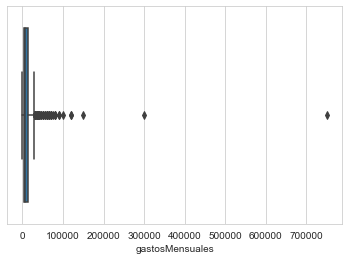

In [286]:
sns.boxplot(X_train['gastosMensuales'])

In [287]:
df_anomalies_gastosMensuales = pd.DataFrame(anomalies_gastosMensuales, columns = ['ID','Otro'])

In [288]:
outliers_1_2_3 = (pd.merge(outliers_1_2, 
                           df_anomalies_gastosMensuales,
                           how='inner', on = "ID")['ID'].values)
print(outliers_1_2_3)

[386 561]


#### Nota: Hay solo 2 registros que cumplen con la condición de tener "monto solicitado", "ingresos mensuales" y "gastos mensuales" ALTOS

## 1.4 Codificación de variables categóricas

#### Los campos 'genero' y 'nivelEstudio" son necesario categorizarlos


Unimos los dataframe de X_train y X_test (luego los volveremos a separar) para realizar la codificación de variables categóricas de forma homogénea en ambos conjuntos de datos

In [289]:
df_train_and_test = pd.concat([X_train, X_test], axis = 0)

In [290]:
print(f"Número total de registros: {len(df_train_and_test)}")

Número total de registros: 1300


#### Ahora tenemos un DataFrame cuyos últimos 300 registros son del set de test, luego los separaremos

In [291]:
# Para los campos de 'genero' y 'nivelEstudio' es necesario categorizarlos 
# entonces creamos las variables dummies 
dummies = pd.get_dummies(df_train_and_test[['genero', 'nivelEstudio']])

# Añadimos las variables binarias al DataFrame de entrenamiento
df_train_and_test = pd.concat([df_train_and_test, dummies], axis = 1)
# Eliminamos la variables originales "genero" y "nivelEstudio"
df_train_and_test = df_train_and_test.drop(columns=['genero','nivelEstudio'])

# 2. Pre-procesamiento de los datos

## 2.1 Normalización
Ajustaremos las variables a una escala del 0 - 1 para que el modelo "comprenda" mejor, después de la normalización, se acelera la velocidad de descenso del gradiente para encontrar la solución óptima y se puede mejorar la precisión.
Los campos que normalizaremos serán:
- edad
- montoSolicitado
- montoOtorgado
- fico
- ingresosMensuales
- gastosMensuales

In [292]:
df_train_and_test.columns

Index(['ID', 'edad', 'montoSolicitado', 'montoOtorgado', 'quincenal',
       'dependientesEconomicos', 'fico', 'ingresosMensuales',
       'gastosMensuales', 'emailScore', 'browser', 'NUMTDC_AV',
       'genero_Hombre', 'genero_Mujer', 'nivelEstudio_Doctorado',
       'nivelEstudio_Maestr√≠a', 'nivelEstudio_Ninguno',
       'nivelEstudio_Preparatoria', 'nivelEstudio_Primaria',
       'nivelEstudio_Secundaria', 'nivelEstudio_Universidad'],
      dtype='object')

In [293]:
min_max_scaler = preprocessing.MinMaxScaler()

In [294]:
seleccion = ['edad','montoSolicitado','montoOtorgado','fico','ingresosMensuales','gastosMensuales']
df_train_and_test[seleccion] = min_max_scaler.fit_transform(df_train_and_test[seleccion])

In [295]:
df_train_and_test.head()

,ID,edad,montoSolicitado,montoOtorgado,quincenal,dependientesEconomicos,fico,ingresosMensuales,gastosMensuales,emailScore,...,NUMTDC_AV,genero_Hombre,genero_Mujer,nivelEstudio_Doctorado,nivelEstudio_Maestr√≠a,nivelEstudio_Ninguno,nivelEstudio_Preparatoria,nivelEstudio_Primaria,nivelEstudio_Secundaria,nivelEstudio_Universidad
0,1,0.392157,0.073087,0.110000,0,1,0.750000,0.007765,0.009331,0.0,...,1.0,1,0,0,0,0,0,0,0,1
1,2,0.156863,0.018121,0.027273,1,0,0.867647,0.008876,0.003997,0.0,...,1.0,1,0,0,0,0,1,0,0,0
2,3,0.196078,0.087114,0.131111,0,0,0.768717,0.008320,0.002664,1.0,...,3.0,1,0,0,0,0,0,0,0,1
3,4,0.176471,0.073933,0.053394,0,0,0.870321,0.014209,0.005731,1.0,...,1.0,1,0,0,0,0,0,0,0,1
4,5,0.254902,0.127517,0.111111,1,1,0.593583,0.022209,0.015997,1.0,...,1.0,1,0,0,0,0,0,0,0,1


#### Listo! tenemos las variables numéricas normalizadas
#### Ahora volvemos a dividir el dataset en "entrenamiento" y "test"

In [296]:
X_train = df_train_and_test.iloc[0:1000]
X_test = df_train_and_test.iloc[1000:]

In [297]:
print(f"Dataset de training: {len(X_train)}")
print(f"Dataset de test: {len(X_test)}")

Dataset de training: 1000
Dataset de test: 300


#### Listo! tenemos X_train y X_test de vuelta

## 2.2 Correlación
Utilizaremos para la correlación X_train y y_train

In [298]:
# Matriz der correlacion
df_correlation = pd.concat([X_train, y_train], axis = 1)

In [299]:
# Eliminaremos el campo "ID" de la matriz de correlación, es solo un identificador, no se correlaciona con nada
df_correlation.pop("ID")

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: ID, Length: 1000, dtype: int64

<AxesSubplot:>

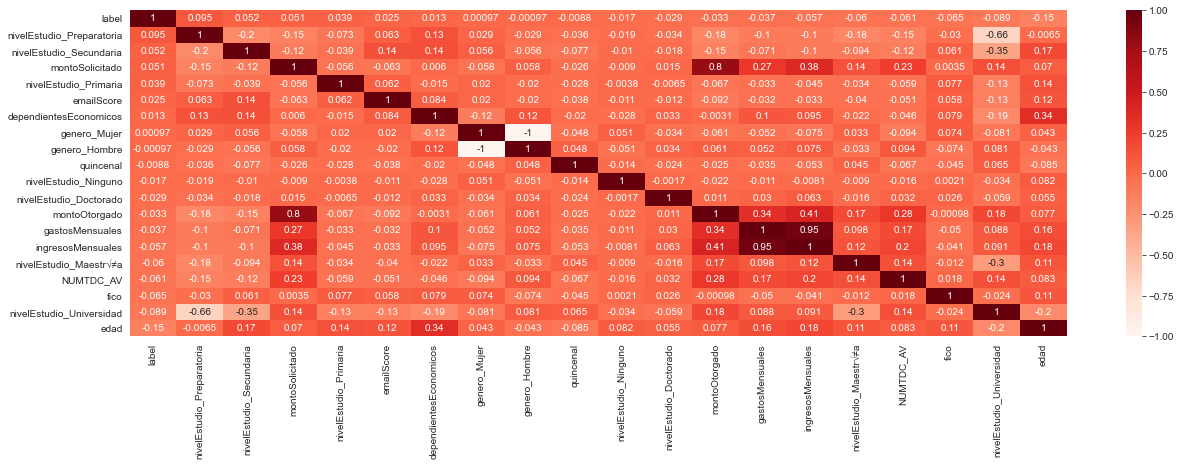

In [300]:
k = len(df_correlation.columns) # Número de variables para el heatmap
cols = df_correlation.corr().nlargest(k, 'label')['label'].index
cm = df_correlation[cols].corr()
plt.figure(figsize=(21,6))
sns.heatmap(cm, annot=True, cmap = 'Reds')

In [301]:
X_train.columns.values

array(['ID', 'edad', 'montoSolicitado', 'montoOtorgado', 'quincenal',
       'dependientesEconomicos', 'fico', 'ingresosMensuales',
       'gastosMensuales', 'emailScore', 'browser', 'NUMTDC_AV',
       'genero_Hombre', 'genero_Mujer', 'nivelEstudio_Doctorado',
       'nivelEstudio_Maestr√≠a', 'nivelEstudio_Ninguno',
       'nivelEstudio_Preparatoria', 'nivelEstudio_Primaria',
       'nivelEstudio_Secundaria', 'nivelEstudio_Universidad'],
      dtype=object)

In [302]:
# Aplicamos SelectKBest para extraer las mejores características
bestfeatures = SelectKBest(score_func=f_regression, k='all')

seleccion = ['edad', 'montoSolicitado', 'montoOtorgado', 'quincenal',
             'dependientesEconomicos', 'fico', 'ingresosMensuales',
             'gastosMensuales', 'emailScore', 'NUMTDC_AV',
             'genero_Hombre', 'genero_Mujer', 'nivelEstudio_Doctorado',
             'nivelEstudio_Maestr√≠a', 'nivelEstudio_Ninguno',
             'nivelEstudio_Preparatoria', 'nivelEstudio_Primaria',
             'nivelEstudio_Secundaria', 'nivelEstudio_Universidad']
fit = bestfeatures.fit(X_train[seleccion],y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train[seleccion].columns)

# Concatenamos los 2 dataframes para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print("\nBEST FEATURES (from 0-98)")
print("=========================\n")
print(featureScores.nlargest(20,'Score'))  # Desplegamos las mejores características


BEST FEATURES (from 0-98)

                        Specs      Score
0                        edad  21.892794
15  nivelEstudio_Preparatoria   9.014127
18   nivelEstudio_Universidad   8.045949
5                        fico   4.176001
9                   NUMTDC_AV   3.670982
13     nivelEstudio_Maestr√≠a   3.554521
6           ingresosMensuales   3.246072
17    nivelEstudio_Secundaria   2.736160
1             montoSolicitado   2.570923
16      nivelEstudio_Primaria   1.555561
7             gastosMensuales   1.354085
2               montoOtorgado   1.077608
12     nivelEstudio_Doctorado   0.847722
8                  emailScore   0.600474
14       nivelEstudio_Ninguno   0.281849
4      dependientesEconomicos   0.170298
3                   quincenal   0.076971
10              genero_Hombre   0.000933
11               genero_Mujer   0.000933


#### Tomaremos las características cuyo valor de relevancia sea mayor o igual 1 

In [303]:
features = featureScores[featureScores['Score'] >= 1]['Specs'].to_list()
print(features)

['edad', 'montoSolicitado', 'montoOtorgado', 'fico', 'ingresosMensuales', 'gastosMensuales', 'NUMTDC_AV', 'nivelEstudio_Maestr√≠a', 'nivelEstudio_Preparatoria', 'nivelEstudio_Primaria', 'nivelEstudio_Secundaria', 'nivelEstudio_Universidad']


In [304]:
X_train = X_train[features]
X_test = X_test[features]

In [305]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       1000 non-null   float64
 1   montoSolicitado            1000 non-null   float64
 2   montoOtorgado              1000 non-null   float64
 3   fico                       1000 non-null   float64
 4   ingresosMensuales          1000 non-null   float64
 5   gastosMensuales            1000 non-null   float64
 6   NUMTDC_AV                  1000 non-null   float64
 7   nivelEstudio_Maestr√≠a     1000 non-null   uint8  
 8   nivelEstudio_Preparatoria  1000 non-null   uint8  
 9   nivelEstudio_Primaria      1000 non-null   uint8  
 10  nivelEstudio_Secundaria    1000 non-null   uint8  
 11  nivelEstudio_Universidad   1000 non-null   uint8  
dtypes: float64(7), uint8(5)
memory usage: 67.4 KB


## 2.3: Imbalanceo de clases
Entrenar un modelo con imbalanceo de clases podría fectar negativamente el "accuracy" de las predicciones, de tal manera que se procederá a hacer un "resampling" de los datos para que desaparezca ese imbalanceo.
Hay 780 clientes "NO MOROSOS" y 220 clientes "MOROSOS".

In [306]:
imbalanceo = y_train.groupby("label")["label"].count()
print(imbalanceo)

label
0    780
1    220
Name: label, dtype: int64


#### Hay un imbalanceo de clases, 780 = 0 (no morosos) y 220 = 1 (morosos)

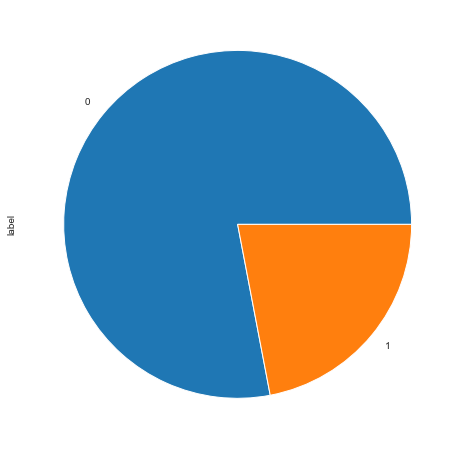

In [307]:
imbalanceo.plot.pie(figsize=(8, 8));

#### Para balancear las clases haremos un resampling con SMOTE (OverSampling)

In [308]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'label': 1})

In [309]:
y_resampled.groupby("label")["label"].count()

label
0    780
1    780
Name: label, dtype: int64

#### Ahora tenemos las clases balanceadas: 
- 0: 780
- 1: 780 
- y además tenemos en total 1560 registros de entrenamiento! antes solo eran 1000!

#### 2.4 Separación del set de entrenamiento y Test
Procederemos a realizar la separación de los datos para la obtención del set de entrenamiento y test. Hay otro set de "Test" ("Test Data.csv") pero ese no tiene etiquetas y será usado solo para hacer las predicciones y enviarlas en un archivo a los técnicos ATRATO para su revisión.
Para el entrenamiento tomaremos el 80% de los datos y dejaremos el otro 20% para el test.

In [310]:
X, y = X_resampled, y_resampled

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [312]:
print(f"Datos de entrenamiento: {len(X_train)}")
print(f"Datos de entrenamiento: {len(X_test)}")

Datos de entrenamiento: 1248
Datos de entrenamiento: 312


#### Tenemos listo nuestro set de entrenamiento y test :)

# 3. Entrenamiento y Testing del modelo

Debido a que teníamos un dataset con alto grado de imbalanceo (al cual le hicimos un OverSampling para nivelarlo), se decidió utilizar las librerías de imblearn que es una biblioteca de código abierto con licencia del MIT que se basa en scikit-learn (importado como sklearn) y proporciona herramientas cuando se trata de la clasificación con clases desequilibradas.

#### Primero creamos dos funciones que nos servirán para representar graficamente la matriz de confusión y el Roc AUC

In [315]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

# Gráfico de la matriz de confusión
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    
    y_pred_labels = (y_pred > th)
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

# Gráfico del Roc AUC
def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred > th)
    y_test_pred_labels  = (y_test_pred > th)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

## 3.1 Ensemble AdaBoost Classifier
El primer algoritmo que probaremos será el algoritmo AdaBoost

In [324]:
# Entrenamiento EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
model_ensemble = EasyEnsembleClassifier(n_estimators=100, random_state=1)
model_ensemble.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [325]:
# Calculo del balanced accuracy score
predictions = model_ensemble.predict(X_test)
bal_acc_score = balanced_accuracy_score(y_test, predictions)
bal_acc_score

0.7167763157894737

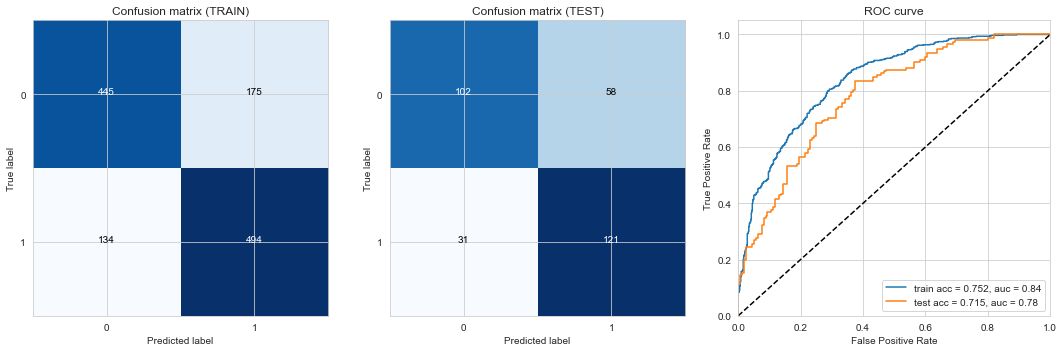

In [326]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = model_ensemble.predict_proba(X_train)[:,1]
y_test_pred = model_ensemble.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [327]:
# Imprimimos imbalanced classification report
print(classification_report_imbalanced(y_test, predictions, target_names=["Bajo riesgo: 0", "Alto riesgo: 1"]))

                      pre       rec       spe        f1       geo       iba       sup

Bajo riesgo: 0       0.77      0.64      0.80      0.70      0.71      0.50       160
Alto riesgo: 1       0.68      0.80      0.64      0.73      0.71      0.52       152

   avg / total       0.72      0.71      0.72      0.71      0.71      0.51       312



#### No está mal (para empezar), con AdaBoost tenemos alrededor de 71% de accuracy!

## 3.2 BalancedRandomForestClassifier
Ahora probaremos con el algoritmo BalancedRandomForestClassifier

In [328]:
# Entrenamiento con BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100,
                                           max_depth=20,
                                           max_features='auto', 
                                           bootstrap=True,
                                           sampling_strategy='auto',
                                           replacement=False,
                                           random_state=1)
brf_model.fit(X_train, y_train)

BalancedRandomForestClassifier(max_depth=20, random_state=1)

In [329]:
# Calculo del balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
predictions = brf_model.predict(X_test)
bal_acc_score = balanced_accuracy_score(y_test, predictions)
bal_acc_score

0.8666118421052631

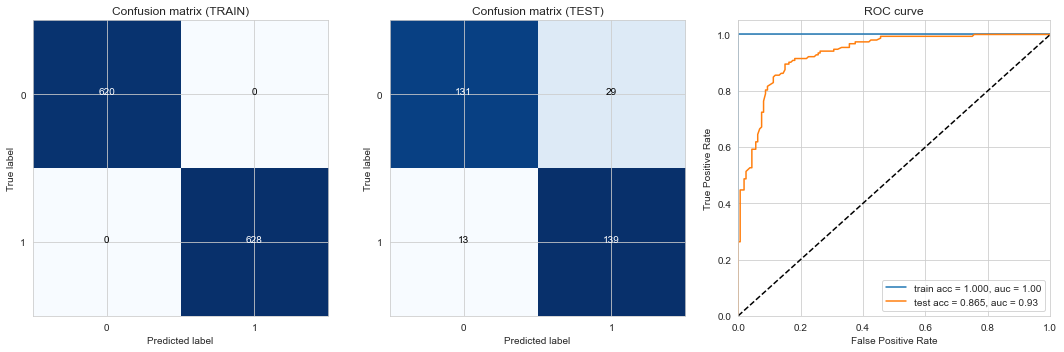

In [330]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = brf_model.predict_proba(X_train)[:,1]
y_test_pred = brf_model.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [331]:
# Imprimimos el imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions, target_names=["Bajo riesgo: 0", "Alto riesgo: 1"]))

                      pre       rec       spe        f1       geo       iba       sup

Bajo riesgo: 0       0.91      0.82      0.91      0.86      0.87      0.74       160
Alto riesgo: 1       0.83      0.91      0.82      0.87      0.87      0.76       152

   avg / total       0.87      0.87      0.87      0.87      0.87      0.75       312



#### Ahora con BalancedRandomForestClassifier obtuvimos alrededor del 86% de accuarcy, nada mal !

## 3.3 Deep Learning - Neural Network (Tensorflow)
Finalmente probaremos con redes neuronales, específicamente con Tensorflow/Keras

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [70]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1,  activation='sigmoid'))

In [71]:
model.compile(optimizer='adam', lr=0.0001, loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
from tensorflow.keras.callbacks import Callback

In [73]:
class BatchLogger(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl = BatchLogger()

In [78]:
history = model.fit(np.array(X_train), 
                    np.array(y_train),
                    batch_size=25, 
                    epochs=5, 
                    verbose=1, 
                    callbacks=[bl],
                    validation_data=(np.array(X_test), np.array(y_test)))

Train on 1248 samples, validate on 312 samples
Epoch 1/5
1248/1248 [==============================] - 0s 143us/sample - loss: 0.1521 - accuracy: 0.9471 - val_loss: 0.7065 - val_accuracy: 0.7821
Epoch 2/5
1248/1248 [==============================] - 0s 119us/sample - loss: 0.1126 - accuracy: 0.9639 - val_loss: 0.6389 - val_accuracy: 0.8141
Epoch 3/5
1248/1248 [==============================] - 0s 115us/sample - loss: 0.0914 - accuracy: 0.9712 - val_loss: 0.6567 - val_accuracy: 0.8077
Epoch 4/5
1248/1248 [==============================] - 0s 119us/sample - loss: 0.0926 - accuracy: 0.9671 - val_loss: 0.6903 - val_accuracy: 0.8109
Epoch 5/5
1248/1248 [==============================] - 0s 122us/sample - loss: 0.0952 - accuracy: 0.9647 - val_loss: 0.7598 - val_accuracy: 0.8077


#### Ahora si tenemos un resultado un poco mas serio con Redes neuronales, alrededor de 96% de accuracy en el entrenamiento pero solo 80% en nuestra validación

In [79]:
score = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print('Test log loss:', score[0])
print('Test accuracy:', score[1])

Test log loss: 0.7598153475003365
Test accuracy: 0.8076923


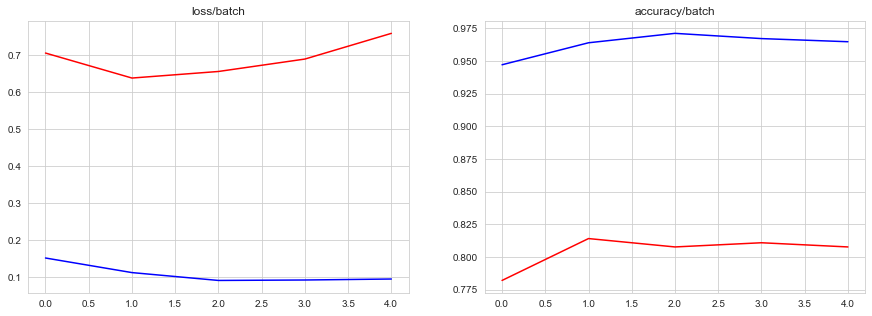

In [332]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss/batch')
plt.plot(bl.get_values('loss',1), 'b-', label='train');
plt.plot(bl.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy/batch')
plt.plot(bl.get_values('accuracy',1), 'b-', label='train');
plt.plot(bl.get_values('val_accuracy',1), 'r-', label='test');
plt.show()

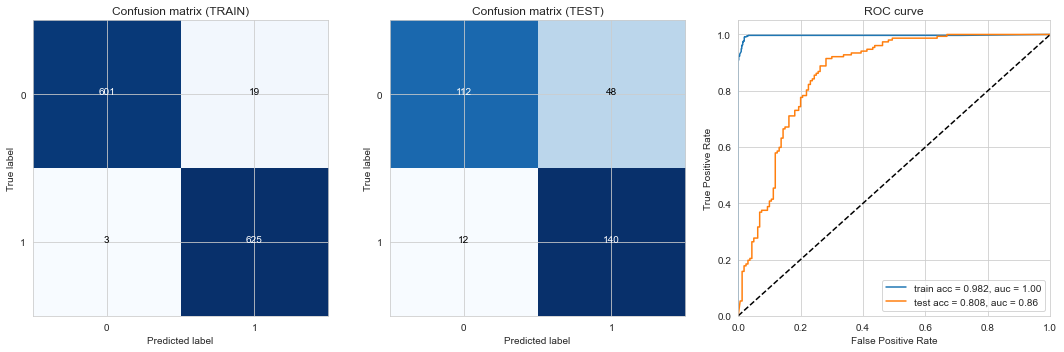

In [333]:
y_train_pred = model.predict_on_batch(np.array(X_train))[:,0]
y_test_pred = model.predict_on_batch(np.array(X_test))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_test, y_test_pred, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred)
    
plt.tight_layout()
plt.show()

## 3.4 Generación de archivo CSV de predicciones del modelo 

De los 3 modelos que entrenamos, el BalancedRandomForestClassifier nos dió el mejor accuracy en set de datos de Test, así que utilizaremos este para generar nuestras predicciones y crear el archivo CSV de predicciones.

#### Cargamos el archivo de "Test Data.csv"

In [334]:
TestData = pd.read_csv("Test Data.csv")

In [335]:
TestData.head()

,ID,edad,montoSolicitado,montoOtorgado,genero,quincenal,dependientesEconomicos,nivelEstudio,fico,ingresosMensuales,gastosMensuales,emailScore,browser,NUMTDC_AV
0,1,30.0,20000.0,40000.0,Hombre,1,0,Universidad,575,25000.0,15000,1.0,UNKNOWN,2.0
1,2,31.0,2000.0,2000.0,Hombre,0,4,Preparatoria,635,12000.0,8000,8.0,CHROME9,NaN
2,3,29.0,15000.0,15000.0,Mujer,0,0,Universidad,568,20000.0,14000,0.0,CHROME_MOBILE,1.0
3,4,20.0,7000.0,6000.0,Mujer,0,1,Preparatoria,643,2000.0,6000,1.0,CHROME_MOBILE,NaN
4,5,34.0,18000.0,12999.0,Hombre,1,1,Universidad,546,50000.0,30000,0.0,APPLE_WEB_KIT,2.0


In [336]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      300 non-null    int64  
 1   edad                    297 non-null    float64
 2   montoSolicitado         300 non-null    float64
 3   montoOtorgado           300 non-null    float64
 4   genero                  300 non-null    object 
 5   quincenal               300 non-null    int64  
 6   dependientesEconomicos  300 non-null    int64  
 7   nivelEstudio            300 non-null    object 
 8   fico                    300 non-null    int64  
 9   ingresosMensuales       300 non-null    float64
 10  gastosMensuales         300 non-null    int64  
 11  emailScore              261 non-null    float64
 12  browser                 257 non-null    object 
 13  NUMTDC_AV               184 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory 

#### Tratamiento de valores nulos

In [337]:
TestData = TestData.fillna(TestData.mode().iloc[0])

In [339]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      300 non-null    int64  
 1   edad                    300 non-null    float64
 2   montoSolicitado         300 non-null    float64
 3   montoOtorgado           300 non-null    float64
 4   genero                  300 non-null    object 
 5   quincenal               300 non-null    int64  
 6   dependientesEconomicos  300 non-null    int64  
 7   nivelEstudio            300 non-null    object 
 8   fico                    300 non-null    int64  
 9   ingresosMensuales       300 non-null    float64
 10  gastosMensuales         300 non-null    int64  
 11  emailScore              300 non-null    float64
 12  browser                 300 non-null    object 
 13  NUMTDC_AV               300 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory 

#### Ahora no tenemos registros nulos

In [340]:
print(len(TestData[TestData.duplicated(['ID'], keep=False)]))

0


#### No hay registros duplicados

##### Tratamiento de variables categoricas

In [341]:
dummies = pd.get_dummies(TestData[['genero', 'nivelEstudio']])

# Añadimos las variables binarias al DataFrame de entrenamiento
X_test_val = pd.concat([TestData, dummies], axis = 1)
# Eliminamos la variables originales "genero" y "nivelEstudio"
X_test_val = X_test_val.drop(columns=['genero','nivelEstudio'])

#### Normalización

In [342]:
min_max_scaler = preprocessing.MinMaxScaler()
seleccion = ['edad','montoSolicitado','montoOtorgado','fico','ingresosMensuales','gastosMensuales']
X_test_val[seleccion] = min_max_scaler.fit_transform(X_test_val[seleccion])

In [343]:
X_test_val.head()

,ID,edad,montoSolicitado,montoOtorgado,quincenal,dependientesEconomicos,fico,ingresosMensuales,gastosMensuales,emailScore,browser,NUMTDC_AV,genero_Hombre,genero_Mujer,nivelEstudio_Doctorado,nivelEstudio_Maestr√≠a,nivelEstudio_Preparatoria,nivelEstudio_Primaria,nivelEstudio_Secundaria,nivelEstudio_Universidad
0,1,0.24,0.127517,0.393939,1,0,0.817923,0.047715,0.033237,1.0,UNKNOWN,2.0,1,0,0,0,0,0,0,1
1,2,0.26,0.006711,0.010101,0,4,0.903272,0.021652,0.017680,8.0,CHROME9,1.0,1,0,0,0,1,0,0,0
2,3,0.22,0.093960,0.141414,0,0,0.807966,0.037690,0.031014,0.0,CHROME_MOBILE,1.0,0,1,0,0,0,0,0,1
3,4,0.04,0.040268,0.050505,0,1,0.914651,0.001604,0.013235,1.0,CHROME_MOBILE,1.0,0,1,0,0,1,0,0,0
4,5,0.32,0.114094,0.121202,1,1,0.776671,0.097835,0.066573,0.0,APPLE_WEB_KIT,2.0,1,0,0,0,0,0,0,1


In [344]:
IDs = X_test_val.pop("ID")

In [345]:
X_test_val = X_test_val[features]

In [346]:
y_test_pred_val = brf_model.predict_proba(X_test_val)[:,1]
y_test_pred_val_2 = brf_model.predict(X_test_val)

In [347]:
y_test_pred_val_2

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], d

In [348]:
predicciones = pd.concat([IDs, pd.DataFrame(y_test_pred_val)], axis = 1)
predicciones = pd.concat([predicciones, pd.DataFrame(y_test_pred_val_2)], axis = 1) 
predicciones.columns = ["ID","Score","Pred"]
predicciones.head()

,ID,Score,Pred
0,1,0.250000,0
1,2,0.620000,1
2,3,0.348998,0
3,4,0.580000,1
4,5,0.242500,0


#### Tenemos el dataframe de predicciones que consta de:
- ID
- Score del modelo (Riesgo de default), de manera tal que mientras mayor sea el número mas probabilidad hay de un "inpago".
- Predicción del modelo:
    - 0: NO se atrasará en el pago mas de 28 días
    - 1: SI se atrasará en el pago mas de 28 días
    - Estos valores se predicen de acuerdo al punto de corte 0.5

In [349]:
predicciones.to_csv("Predicciones.csv", index = False)

## 3.5 Cambiando el punto de corte, cual seleccionamos y por qué ?
Retomaremos las predicciones de nuestro modelo seleccionado y probaremos cambiando el punto de corte, estas serán nuestras opciones para el punto de corte:
- 0.4
- 0.5
- 0.6
- 0.7
- 0.8
- 0.9

In [350]:
df_predicciones = pd.DataFrame()
df_predicciones['clasificacion_0.4'] = np.where(y_test_pred > 0.4, 1, 0)
df_predicciones['clasificacion_0.6'] = np.where(y_test_pred > 0.6, 1, 0)
df_predicciones['clasificacion_0.7'] = np.where(y_test_pred > 0.7, 1, 0)
df_predicciones['clasificacion_0.8'] = np.where(y_test_pred > 0.8, 1, 0)
df_predicciones['clasificacion_0.9'] = np.where(y_test_pred > 0.9, 1, 0)

In [351]:
bal_acc_score_04 = balanced_accuracy_score(y_test, df_predicciones['clasificacion_0.4'])
print(f"Accuracy con punto de corte 0.4: {bal_acc_score_04}")

print(f"Accuracy con punto de corte 0.5: {bal_acc_score}")

bal_acc_score_06 = balanced_accuracy_score(y_test, df_predicciones['clasificacion_0.6'])
print(f"Accuracy con punto de corte 0.6: {bal_acc_score_06}")

bal_acc_score_07 = balanced_accuracy_score(y_test, df_predicciones['clasificacion_0.7'])
print(f"Accuracy con punto de corte 0.7: {bal_acc_score_07}")

bal_acc_score_08 = balanced_accuracy_score(y_test, df_predicciones['clasificacion_0.8'])
print(f"Accuracy con punto de corte 0.8: {bal_acc_score_08}")

bal_acc_score_09 = balanced_accuracy_score(y_test, df_predicciones['clasificacion_0.9'])
print(f"Accuracy con punto de corte 0.9: {bal_acc_score_09}")

Accuracy con punto de corte 0.4: 0.8011513157894736
Accuracy con punto de corte 0.5: 0.8666118421052631
Accuracy con punto de corte 0.6: 0.8103618421052632
Accuracy con punto de corte 0.7: 0.8166118421052632
Accuracy con punto de corte 0.8: 0.8097039473684211
Accuracy con punto de corte 0.9: 0.7991776315789474


#### El mejor punto de corte fue el escogido: 0.5

Según las diferentes pruebas que se hicieron ese fue el mejor punto de corte:
- Accuracy con punto de corte 0.4: 0.8011513157894736 , aprox. 80.11%
- Accuracy con punto de corte 0.5: 0.8666118421052631 , aprox. 86.66%
- Accuracy con punto de corte 0.6: 0.8103618421052632 , aprox. 81.03%
- Accuracy con punto de corte 0.7: 0.8166118421052632 , aprox. 81.66%
- Accuracy con punto de corte 0.8: 0.8097039473684211 , aprox. 80.97%
- Accuracy con punto de corte 0.9: 0.7991776315789474 , aprox. 79.91%

Pero todo dependerá, si se quiere disminuir el riesgo de "impago" (default),
entonces deberíamos disminuir el punto de corte, de esta forma los registros
clasificados con el valor de 1 (que significan "se atrasará en el pago mas de 28
días") serán mas, pero de esta manera se concederán menos créditos!!! Es una
decisión a tomar muy interesante y que se pudiese alternar de acuerdo a como se
mueva la balanza de pagos de la compañía y de los aciertos que obtenga el modelo.

Si la cantidad de personas que terminan en "default" son menos de las que
predice el modelo entonces podríamos incrementar el punto de corte y así clasificar
a más personas como clientes "APTOS" para el crédito, si sucede lo contrario
entonces habría que reducir el punto de corte porque estaría ocurriendo que más
personas de las que predice el modelo estarían entrando en morosidad y
tendríamos que disminuir la cantidad de personas "APTAS" que podrían caer en
"default" (es solo una idea no probada por mí, dependerá de la política de la
empresa, pero al menos tiene lógica).

Teniendo en cuenta todo esto, hay que considerar las probabilidades generadas
por el modelo de Machine LEarning como la seguridad que tiene este, desde su
visión limitada, al realizar las predicciones y estas se podrían calibrar de acuerdo al
punto de corte escogido.

## 3.6 Explicación de cómo pondrías este modelo en producción y que tendrías que estarle cuidando con el tiempo.

- Para colocar el modelo en producción primero debemos guardar el modelo entrenado para luego cargarlo y ponerlo en trabajar, así como también construir un pipeline con los pasos necesarios para pre-procesar los registros que serán suministrados posteriormente para realizar las predicciones, efectivamente esos registros necesitan ser pre-procesados también.
- Si trabajamos en la nube (por ejemplo AWS) se podría implementar con los servicios de AWS-Endpoint, se cargaría el modelo previamente guardado, se aplicaría el pipeline necesario y luego la puesta en marcha del End-point propiamente dicho programandolo adecuadamente.
- Otra opción sería la puesta en marcha desde un proceso batch que continuamente "escuche" las peticiones que se le hagan para procesarlas y responder a través de un API, todo este desde la plataforma que mas convenga.
- ¿ Que cuidar con el tiempo ?
    - Los modelos de Machine Learning una vez entrenados no cambian, siguen entrenados con los mismos datos, pero lo que SI CAMBIA SON LOS DATOS QUE SE LE SUMINISTRAN PARA REALIZAR LAS PREDICCIONES!!!! SIEMPRE LO HACEN A TRAVÉS DEL TIEMPO!!! de manera tal que sería necesario el constante monitoreo y reentranimiento de estos modelos a fin de preservar o mejorar el accuracy de los mismos. 